In [ ]:
import numpy as np
import pandas as pd 
import plotly
from plotly import graph_objs as go
import datetime

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt

from plotly import tools
import seaborn as sns
init_notebook_mode(connected=True)
from itertools import zip_longest
import string 
import re

from nltk.corpus import stopwords 
from nltk.util import ngrams
#for sentiment analysis
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk 
import zipfile

Download the specific truncated dataset here: https://www.kaggle.com/aagghh/crypto-telegram-groups?select=group_messages_binance.json

Upload the zip and extract the zip within the session:


In [ ]:
!unzip /content/expanded_dataset.zip

Archive:  /content/expanded_dataset.zip
replace expanded_dataset/binance_1_28-3_23.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: expanded_dataset/binance_1_28-3_23.json  
  inflating: expanded_dataset/bittrex_1_28-3_23.json  
  inflating: expanded_dataset/huobi_1_28-3_23.json  
  inflating: expanded_dataset/kucoin_1_28-3_23.json  
  inflating: expanded_dataset/OKEx_1_28-3_23.json  


In [ ]:
pd.set_option('display.max_colwidth',3000)
binance = pd.read_json('expanded_dataset/binance_1_28-3_23.json')
okex = pd.read_json('expanded_dataset/OKEx_1_28-3_23.json')
bittrex = pd.read_json('expanded_dataset/bittrex_1_28-3_23.json')
huobi = pd.read_json('expanded_dataset/huobi_1_28-3_23.json')
kucoin = pd.read_json('expanded_dataset/kucoin_1_28-3_23.json')


In [ ]:
binance = binance['messages']
okex = okex['messages']
bittrex = bittrex['messages']
huobi = huobi['messages']
kucoin = kucoin['messages']

In [ ]:
#Used to add sentiment data into the datasets
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

#Binance sentiment analysis
for messageInfo in binance:
  if not 'text' in messageInfo:
    continue

  if type(messageInfo['text']) is str:
    polarity_scores = sia.polarity_scores(messageInfo['text'])
  elif type(messageInfo['text']) is dict:
    polarity_scores = sia.polarity_scores(messageInfo['text']['text'])
  else:
    continue

  if (polarity_scores['neg'] > polarity_scores['neu']) and (polarity_scores['neg'] > polarity_scores['pos']):
    messageInfo['sentiment'] = 'negative'
  elif (polarity_scores['neu'] > polarity_scores['pos']) and (polarity_scores['pos'] > polarity_scores['neg']):
    messageInfo['sentiment'] = 'neutral-lean positive'
  elif (polarity_scores['pos'] == polarity_scores['neg']):
    messageInfo['sentiment'] = 'neutral'
  elif (polarity_scores['neu'] > polarity_scores['pos']):
    messageInfo['sentiment'] = 'neutral-lean negative'
  else:
    messageInfo['sentiment'] = 'positive'

#Okex sentiment analysis
for messageInfo in okex:
  if not 'text' in messageInfo:
    continue

  if type(messageInfo['text']) is str:
    polarity_scores = sia.polarity_scores(messageInfo['text'])
  elif type(messageInfo['text']) is dict:
    polarity_scores = sia.polarity_scores(messageInfo['text']['text'])
  else:
    continue

  if (polarity_scores['neg'] > polarity_scores['neu']) and (polarity_scores['neg'] > polarity_scores['pos']):
    messageInfo['sentiment'] = 'negative'
  elif (polarity_scores['neu'] > polarity_scores['pos']) and (polarity_scores['pos'] > polarity_scores['neg']):
    messageInfo['sentiment'] = 'neutral-lean positive'
  elif (polarity_scores['pos'] == polarity_scores['neg']):
    messageInfo['sentiment'] = 'neutral'
  elif (polarity_scores['neu'] > polarity_scores['pos']):
    messageInfo['sentiment'] = 'neutral-lean negative'
  else:
    messageInfo['sentiment'] = 'positive'

#Bittrex sentiment analysis
for messageInfo in bittrex:
  if not 'text' in messageInfo:
    continue

  if type(messageInfo['text']) is str:
    polarity_scores = sia.polarity_scores(messageInfo['text'])
  elif type(messageInfo['text']) is dict:
    polarity_scores = sia.polarity_scores(messageInfo['text']['text'])
  else:
    continue

  if (polarity_scores['neg'] > polarity_scores['neu']) and (polarity_scores['neg'] > polarity_scores['pos']):
    messageInfo['sentiment'] = 'negative'
  elif (polarity_scores['neu'] > polarity_scores['pos']) and (polarity_scores['pos'] > polarity_scores['neg']):
    messageInfo['sentiment'] = 'neutral-lean positive'
  elif (polarity_scores['pos'] == polarity_scores['neg']):
    messageInfo['sentiment'] = 'neutral'
  elif (polarity_scores['neu'] > polarity_scores['pos']):
    messageInfo['sentiment'] = 'neutral-lean negative'
  else:
    messageInfo['sentiment'] = 'positive'

#Huobi sentiment analysis
for messageInfo in huobi:
  if not 'text' in messageInfo:
    continue

  if type(messageInfo['text']) is str:
    polarity_scores = sia.polarity_scores(messageInfo['text'])
  elif type(messageInfo['text']) is dict:
    polarity_scores = sia.polarity_scores(messageInfo['text']['text'])
  else:
    continue

  if (polarity_scores['neg'] > polarity_scores['neu']) and (polarity_scores['neg'] > polarity_scores['pos']):
    messageInfo['sentiment'] = 'negative'
  elif (polarity_scores['neu'] > polarity_scores['pos']) and (polarity_scores['pos'] > polarity_scores['neg']):
    messageInfo['sentiment'] = 'neutral-lean positive'
  elif (polarity_scores['pos'] == polarity_scores['neg']):
    messageInfo['sentiment'] = 'neutral'
  elif (polarity_scores['neu'] > polarity_scores['pos']):
    messageInfo['sentiment'] = 'neutral-lean negative'
  else:
    messageInfo['sentiment'] = 'positive'

#Kucoin sentiment analysis
for messageInfo in kucoin:
  if not 'text' in messageInfo:
    continue

  if type(messageInfo['text']) is str:
    polarity_scores = sia.polarity_scores(messageInfo['text'])
  elif type(messageInfo['text']) is dict:
    polarity_scores = sia.polarity_scores(messageInfo['text']['text'])
  else:
    continue

  if (polarity_scores['neg'] > polarity_scores['neu']) and (polarity_scores['neg'] > polarity_scores['pos']):
    messageInfo['sentiment'] = 'negative'
  elif (polarity_scores['neu'] > polarity_scores['pos']) and (polarity_scores['pos'] > polarity_scores['neg']):
    messageInfo['sentiment'] = 'neutral-lean positive'
  elif (polarity_scores['pos'] == polarity_scores['neg']):
    messageInfo['sentiment'] = 'neutral'
  elif (polarity_scores['neu'] > polarity_scores['pos']):
    messageInfo['sentiment'] = 'neutral-lean negative'
  else:
    messageInfo['sentiment'] = 'positive'



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
print(binance.head())

0                                                                                                {'id': 11000005, 'type': 'message', 'date': '2021-02-23T06:40:35', 'from': 'Amin', 'from_id': 4518799188, 'text': 'Btc$', 'sentiment': 'neutral'}
1                                                                 {'id': 11000007, 'type': 'message', 'date': '2021-02-23T06:40:35', 'from': 'Noreg', 'from_id': 5540227662, 'text': 'BNB back to 30$ nice', 'sentiment': 'neutral-lean positive'}
2                                                                                    {'id': 11000008, 'type': 'message', 'date': '2021-02-23T06:40:36', 'from': 'Vicky', 'from_id': 4841976032, 'text': 'btc to 8k$ ????', 'sentiment': 'neutral'}
3                                                            {'id': 11000010, 'type': 'message', 'date': '2021-02-23T06:40:36', 'from': 'Simon', 'from_id': 4523917429, 'reply_to_message_id': 10999940, 'text': 'Ahahah', 'sentiment': 'neutral'}
4    {'id': 11000011, 'type'

In [ ]:
# binance = pd.json_normalize(binance.to_dict(), record_path =['messages'])
binance = pd.json_normalize(binance)
okex = pd.json_normalize(okex)
bittrex = pd.json_normalize(bittrex)
huobi = pd.json_normalize(huobi)
kucoin = pd.json_normalize(kucoin)

In [ ]:
binance = binance.rename(columns={'text': 'message'})
okex = okex.rename(columns={'text': 'message'})
bittrex = bittrex.rename(columns={'text': 'message'})
huobi = huobi.rename(columns={'text': 'message'})
kucoin = kucoin.rename(columns={'text': 'message'})


In [ ]:
binance[110000:110005]

,id,type,date,from,from_id,message,sentiment,reply_to_message_id,file,thumbnail,media_type,mime_type,duration_seconds,width,height,sticker_emoji,edited,actor,actor_id,action,message_id,location_information.latitude,location_information.longitude,place_name,address,forwarded_from,saved_from,photo,via_bot,poll.question,poll.closed,poll.total_voters,poll.answers,members
110000,11155682,message,2021-02-28T07:30:52,Farmer Alt,5.546549e+09,Can be dump or pump lets see tonight,neutral-lean negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110001,11155683,message,2021-02-28T07:30:53,Dave,5.100651e+09,"Sell btc in time, I have already told this is not a normal correction. Sell and buy later much cheaper",neutral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110002,11155688,message,2021-02-28T07:30:58,Kamz,5.654496e+09,"I don't want to get rich overnight, i just want to get a little weekly return on my small investment!!! Is this possible or should i leave the group.. ?",neutral-lean negative,11111779.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110003,11155689,message,2021-02-28T07:30:58,Onza Trnicki,4.995652e+09,"sadly, and a big one",neutral-lean negative,11155664.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110004,11155691,message,2021-02-28T07:31:05,Locke,4.979635e+09,You're die biggest noob,negative,11144288.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
consolidated_data = huobi
consolidated_data = consolidated_data.append(okex)
consolidated_data = consolidated_data.append(bittrex)
consolidated_data = consolidated_data.append(binance)
consolidated_data = consolidated_data.append(kucoin)

In [ ]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#date manipulation
stopwords = stopwords.words('english')
consolidated_data['CreationDate'] = pd.to_datetime(consolidated_data['date'])
consolidated_data['CreationYear'] = consolidated_data['CreationDate'].dt.year
consolidated_data['CreationMonth'] = consolidated_data['CreationDate'].dt.month
consolidated_data['CreationMonth'] = consolidated_data['CreationMonth'].apply(lambda x : "0"+str(x) if len(str(x)) < 2 else x)
#consolidated_data['CreationDay'] = "27"
consolidated_data['CreationDay'] = consolidated_data['CreationDate'].dt.day
#consolidated_data['MessageDate'] = consolidated_data["CreationYear"].astype(str) +"-"+ consolidated_data["CreationMonth"].astype(str) +"-"+ consolidated_data["CreationDay"].astype(str)
consolidated_data['MessageDate'] = pd.to_datetime({'year' : consolidated_data["CreationYear"], 
                                                   'month' : consolidated_data["CreationMonth"], 
                                                   'day' : consolidated_data["CreationDay"]})
#Putting this here as a temp until the original graphs look right
consolidated_data['MessageDate Sentiment'] = consolidated_data["CreationYear"].astype(str) +"-"+ consolidated_data["CreationMonth"].astype(str) +"-"+ consolidated_data["CreationDate"].dt.day.astype(str)
consolidated_data['Message'] = consolidated_data['message'].fillna(" ")

## cleaning text
def clntxt(text):
    if isinstance(text, list):
      return " "
    text = text.lower()
    text = " ".join([c for c in text.split() if c not in stopwords])
    for c in string.punctuation:
        text = text.replace(c, " ")
    text = " ".join([c for c in text.split() if c not in stopwords])
    
    words = []
    ignorewords = ["www", "http","https" "com"]
    for wrd in text.split():
        if len(wrd) <= 2: 
            continue
        if wrd in ignorewords:
            continue
        words.append(wrd)
    text = " ".join(words)    
    return text

# counting mentions
def count_presence(txt, wrds):    
    cnt = 0
    txt = " "+txt+" "
    for wrd in wrds.split("|"):
        if " "+wrd+" " in txt:
            cnt += 1 
    return cnt

consolidated_data['CleanMessage'] = consolidated_data['Message'].apply(lambda x : clntxt(x))

In [ ]:
temp = consolidated_data.groupby('MessageDate')
print(temp)

In [ ]:
import plotly.io as pio
pio.renderers.default = 'colab'
def plotit(listed, title):    
    traces = []
    for model in listed:
        temp = consolidated_data.groupby('MessageDate').agg({model : "sum"}).reset_index()
        #temp = temp.sort_values(by=['CreationDate'])
        print(temp)
        trace = go.Scatter(x = temp["MessageDate"], y = temp[model], name=model.split("|")[0].title(), line=dict(shape="spline", width=2), mode = "lines")
        print(trace)
        traces.append(trace)

    layout = go.Layout(
        paper_bgcolor='#fff',
        plot_bgcolor="#fff",
        legend=dict(orientation="h", y=1.1),
        title=title,
        title_x=0.5,
        xaxis=dict(
            gridcolor='rgb(255,255,255)',
            showgrid=True,
            showline=False,
            showticklabels=True,
            tickcolor='rgb(127,127,127)',
            ticks='outside',
            zeroline=False
        ),
        yaxis=dict(
            title="Number of Mentions",
            gridcolor='rgb(255,255,255)',
            showgrid=False,
            showline=False,
            showticklabels=True,
            tickcolor='rgb(127,127,127)',
            ticks='outside',
            zeroline=False
        ),
    )

    fig = go.Figure(data=traces, layout=layout)
    iplot(fig)

#btc vs eth
models = ["btc", "eth"]
for col in models:
    consolidated_data[col] = consolidated_data["CleanMessage"].apply(lambda x : count_presence(x, col))
plotit(models, "Telegram Discussions: BTC vs ETH")

   MessageDate   btc
0   2021-01-28   150
1   2021-01-29   179
2   2021-01-30    60
3   2021-01-31   128
4   2021-02-01   104
5   2021-02-02   192
6   2021-02-03   131
7   2021-02-04   127
8   2021-02-05   178
9   2021-02-06   221
10  2021-02-07   206
11  2021-02-08   371
12  2021-02-09   149
13  2021-02-10   164
14  2021-02-11   189
15  2021-02-12   124
16  2021-02-13   114
17  2021-02-14   144
18  2021-02-15   192
19  2021-02-16   234
20  2021-02-17   240
21  2021-02-18   144
22  2021-02-19   256
23  2021-02-20   313
24  2021-02-21   200
25  2021-02-22   358
26  2021-02-23  1388
27  2021-02-24  1199
28  2021-02-25  1396
29  2021-02-26  1399
30  2021-02-27  1176
31  2021-02-28  1880
32  2021-03-01  1139
33  2021-03-02  1087
34  2021-03-03  1369
35  2021-03-04  1365
36  2021-03-05   989
37  2021-03-06   974
38  2021-03-07   986
39  2021-03-08   824
40  2021-03-09   822
41  2021-03-10  1020
42  2021-03-11   911
43  2021-03-12   876
44  2021-03-13  1295
45  2021-03-14   825
46  2021-03-1

In [ ]:
models = ["dot", "xrp", "ltc", "xlm"]
for col in models:
    consolidated_data[col] = consolidated_data["CleanMessage"].apply(lambda x : count_presence(x, col))
plotit(models, "Telegram Discussions: DOT vs XRP vs LTC vs XLM")

   MessageDate  dot
0   2021-01-28   32
1   2021-01-29   19
2   2021-01-30   21
3   2021-01-31   12
4   2021-02-01   11
5   2021-02-02   28
6   2021-02-03   56
7   2021-02-04   39
8   2021-02-05   51
9   2021-02-06   26
10  2021-02-07   24
11  2021-02-08   29
12  2021-02-09    8
13  2021-02-10   21
14  2021-02-11   24
15  2021-02-12   28
16  2021-02-13   21
17  2021-02-14   22
18  2021-02-15   30
19  2021-02-16   32
20  2021-02-17   21
21  2021-02-18   18
22  2021-02-19   32
23  2021-02-20   58
24  2021-02-21   28
25  2021-02-22   30
26  2021-02-23   85
27  2021-02-24  153
28  2021-02-25  117
29  2021-02-26  176
30  2021-02-27  247
31  2021-02-28  203
32  2021-03-01  166
33  2021-03-02  158
34  2021-03-03  139
35  2021-03-04  109
36  2021-03-05  118
37  2021-03-06  138
38  2021-03-07  116
39  2021-03-08  111
40  2021-03-09  105
41  2021-03-10  102
42  2021-03-11   81
43  2021-03-12   80
44  2021-03-13   86
45  2021-03-14   60
46  2021-03-15   83
47  2021-03-16   74
48  2021-03-17  105


In [ ]:
#btc vs defi
models = ["btc", "defi"]
for col in models:
    consolidated_data[col] = consolidated_data["CleanMessage"].apply(lambda x : count_presence(x, col))
plotit(models, "Telegram Discussions: BTC vs DeFi") 

   MessageDate   btc
0   2021-01-28   150
1   2021-01-29   179
2   2021-01-30    60
3   2021-01-31   128
4   2021-02-01   104
5   2021-02-02   192
6   2021-02-03   131
7   2021-02-04   127
8   2021-02-05   178
9   2021-02-06   221
10  2021-02-07   206
11  2021-02-08   371
12  2021-02-09   149
13  2021-02-10   164
14  2021-02-11   189
15  2021-02-12   124
16  2021-02-13   114
17  2021-02-14   144
18  2021-02-15   192
19  2021-02-16   234
20  2021-02-17   240
21  2021-02-18   144
22  2021-02-19   256
23  2021-02-20   313
24  2021-02-21   200
25  2021-02-22   358
26  2021-02-23  1388
27  2021-02-24  1199
28  2021-02-25  1396
29  2021-02-26  1399
30  2021-02-27  1176
31  2021-02-28  1880
32  2021-03-01  1139
33  2021-03-02  1087
34  2021-03-03  1369
35  2021-03-04  1365
36  2021-03-05   989
37  2021-03-06   974
38  2021-03-07   986
39  2021-03-08   824
40  2021-03-09   822
41  2021-03-10  1020
42  2021-03-11   911
43  2021-03-12   876
44  2021-03-13  1295
45  2021-03-14   825
46  2021-03-1

In [ ]:
models = ["usdt", "dai"]
for col in models:
    consolidated_data[col] = consolidated_data["CleanMessage"].apply(lambda x : count_presence(x, col))
plotit(models, "Stable coins: USDT vs DAI") 

   MessageDate  usdt
0   2021-01-28    72
1   2021-01-29    49
2   2021-01-30    60
3   2021-01-31    50
4   2021-02-01    55
5   2021-02-02    61
6   2021-02-03    48
7   2021-02-04    71
8   2021-02-05    95
9   2021-02-06    56
10  2021-02-07    70
11  2021-02-08   135
12  2021-02-09   104
13  2021-02-10    84
14  2021-02-11   126
15  2021-02-12    89
16  2021-02-13    81
17  2021-02-14   115
18  2021-02-15   120
19  2021-02-16   102
20  2021-02-17    88
21  2021-02-18   106
22  2021-02-19   271
23  2021-02-20   161
24  2021-02-21   125
25  2021-02-22   126
26  2021-02-23   227
27  2021-02-24   278
28  2021-02-25   261
29  2021-02-26   211
30  2021-02-27   182
31  2021-02-28   226
32  2021-03-01   204
33  2021-03-02   186
34  2021-03-03   182
35  2021-03-04   206
36  2021-03-05   186
37  2021-03-06   200
38  2021-03-07   165
39  2021-03-08   205
40  2021-03-09   265
41  2021-03-10   261
42  2021-03-11   281
43  2021-03-12   255
44  2021-03-13   229
45  2021-03-14   210
46  2021-03-1

In [ ]:
models = ["uniswap", "sushiswap", "1inch"]
for col in models:
    consolidated_data[col] = consolidated_data["CleanMessage"].apply(lambda x : count_presence(x, col))
plotit(models, "DEX: UNISWAP vs Sushiswap vs 1inch")

   MessageDate  uniswap
0   2021-01-28        9
1   2021-01-29       11
2   2021-01-30       16
3   2021-01-31        7
4   2021-02-01        6
5   2021-02-02        4
6   2021-02-03        1
7   2021-02-04       12
8   2021-02-05        4
9   2021-02-06        5
10  2021-02-07        1
11  2021-02-08        9
12  2021-02-09        2
13  2021-02-10        5
14  2021-02-11        1
15  2021-02-12        2
16  2021-02-13        2
17  2021-02-14        5
18  2021-02-15        6
19  2021-02-16        4
20  2021-02-17        3
21  2021-02-18        2
22  2021-02-19        5
23  2021-02-20        9
24  2021-02-21        3
25  2021-02-22        3
26  2021-02-23       20
27  2021-02-24       18
28  2021-02-25       70
29  2021-02-26       14
30  2021-02-27        8
31  2021-02-28        7
32  2021-03-01       17
33  2021-03-02       21
34  2021-03-03        8
35  2021-03-04       11
36  2021-03-05       19
37  2021-03-06        8
38  2021-03-07       14
39  2021-03-08       19
40  2021-03-09  

In [ ]:
#defi protocols
models = ["makerdao", "compound"]
for col in models:
    consolidated_data[col] = consolidated_data["CleanMessage"].apply(lambda x : count_presence(x, col))
plotit(models, "DeFi protocols: MakerDAO vs Compound")

   MessageDate  makerdao
0   2021-01-28         0
1   2021-01-29         0
2   2021-01-30         0
3   2021-01-31         0
4   2021-02-01         0
5   2021-02-02         0
6   2021-02-03         0
7   2021-02-04         0
8   2021-02-05         0
9   2021-02-06         0
10  2021-02-07         0
11  2021-02-08         0
12  2021-02-09         0
13  2021-02-10         0
14  2021-02-11         0
15  2021-02-12         0
16  2021-02-13         0
17  2021-02-14         0
18  2021-02-15         0
19  2021-02-16         0
20  2021-02-17         0
21  2021-02-18         0
22  2021-02-19         0
23  2021-02-20         0
24  2021-02-21         0
25  2021-02-22         0
26  2021-02-23         0
27  2021-02-24         0
28  2021-02-25         0
29  2021-02-26         0
30  2021-02-27         0
31  2021-02-28         0
32  2021-03-01         0
33  2021-03-02         0
34  2021-03-03         0
35  2021-03-04         0
36  2021-03-05         1
37  2021-03-06         0
38  2021-03-07         0


In [ ]:
import plotly.graph_objects as graphpx

#print(consolidated_data.groupby(['MessageDate', 'sentiment']).shape[0])

def plotArea(model): 
  sentiment_temp = consolidated_data.groupby(['MessageDate Sentiment', 'sentiment']).agg({model : 'sum'}).reset_index()
  neutral_sentiment = sentiment_temp[sentiment_temp['sentiment'] == 'neutral']
  neutral_pos_sentiment = sentiment_temp[sentiment_temp['sentiment'] == 'neutral-lean positive']
  neutral_neg_sentiment = sentiment_temp[sentiment_temp['sentiment'] == 'neutral-lean negative']
  positive_sentiment = sentiment_temp[sentiment_temp['sentiment'] == 'positive']
  negative_sentiment = sentiment_temp[sentiment_temp['sentiment'] == 'negative']

  sentiment_plot = graphpx.Figure()
  sentiment_plot.add_trace(go.Scatter(
      name = 'Negative Messages',
      x = negative_sentiment['MessageDate Sentiment'],
      y = negative_sentiment[model],
      stackgroup = 'one'
  ))

  sentiment_plot.add_trace(go.Scatter(
      name = 'Neutral-Lean Negative Messages',
      x = neutral_neg_sentiment['MessageDate Sentiment'],
      y = neutral_neg_sentiment[model],
      stackgroup = 'one'
  ))

  sentiment_plot.add_trace(go.Scatter(
      name = 'Neutral Messages',
      x = neutral_sentiment['MessageDate Sentiment'],
      y = neutral_sentiment[model],
      stackgroup = 'one'
  ))

  sentiment_plot.add_trace(go.Scatter(
      name = 'Neutral-Lean Positive Messages',
      x = neutral_pos_sentiment['MessageDate Sentiment'],
      y = neutral_pos_sentiment[model],
      stackgroup = 'one'
  ))

  sentiment_plot.add_trace(go.Scatter(
      name = 'Positive Messages',
      x = positive_sentiment['MessageDate Sentiment'],
      y = positive_sentiment[model],
      stackgroup = 'one'
  ))

  sentiment_plot.update_layout(
      title = "Sentiment Analysis:"+model,
      xaxis_title='Date',
      yaxis_title='Number of Messages'
  )
  sentiment_plot.show()

plotArea('btc')

In [ ]:
plotArea('defi')

In [ ]:
plotArea('usdt')

In [ ]:
plotArea('dai')

In [ ]:
plotArea('uniswap')

In [ ]:
plotArea('sushiswap')

In [ ]:
plotArea('1inch')

In [ ]:
plotArea('makerdao')

In [ ]:
plotArea('compound')

In [ ]:
#Beginning of Polina's price analysis
btc = pd.read_csv('https://raw.githubusercontent.com/PoliNemkova/Telegram_analysis/main/Bitcoin.csv')
ltc = pd.read_csv('https://raw.githubusercontent.com/PoliNemkova/Telegram_analysis/main/Litecoin.csv')
eth = pd.read_csv('https://raw.githubusercontent.com/PoliNemkova/Telegram_analysis/main/Ethereum.csv')

In [ ]:
btc.head(5)

,date,label,open,high,low,close,volume
0,1/31/2021 0:00,BTC/USD,34333.00000,34407.00567,32228.0,33138.00000,192993444.6
1,1/30/2021 0:00,BTC/USD,34284.00000,34929.00000,32827.0,34341.00000,250364041.5
2,1/29/2021 0:00,BTC/USD,33374.00000,38710.69632,31987.0,34253.00000,981076218.2
3,1/28/2021 0:00,BTC/USD,30421.23655,33800.00000,29918.0,33373.00000,306034791.1
4,1/27/2021 0:00,BTC/USD,32518.32570,32596.00000,29283.0,30421.23655,449828663.8


In [ ]:
btc['mean']=(btc['high'] + btc['low'])/2
btc=btc.drop(['open','close','high','low'], axis=1)

ltc['mean']=(ltc['high'] + ltc['low'])/2
ltc=ltc.drop(['open','close','high','low'], axis=1)

eth['mean']=(eth['high'] + eth['low'])/2
eth=eth.drop(['open','close','high','low'], axis=1)

In [ ]:
eth.head(5)

,date,label,volume,mean
0,1/31/2021 0:00,ETH/USD,154945224.4,1332.95
1,1/30/2021 0:00,ETH/USD,161571026.9,1366.80
2,1/29/2021 0:00,ETH/USD,738343230.8,1364.80
3,1/28/2021 0:00,ETH/USD,491975888.7,1290.90
4,1/27/2021 0:00,ETH/USD,551879872.5,1291.95


Text(0.5, 0, 'Date')

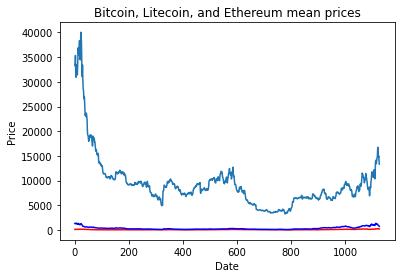

In [ ]:
x = btc['mean']
y = ltc['mean']
z = eth['mean']

plt.plot(x)
plt.plot(y, color = 'r')
plt.plot(z, color = 'b')
plt.title('Bitcoin, Litecoin, and Ethereum mean prices')
plt.ylabel('Price')
plt.xlabel('Date')

Text(0.5, 0, 'Date')

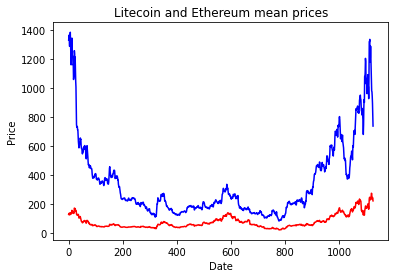

In [ ]:
x = btc['mean']
y = ltc['mean']
z = eth['mean']


plt.plot(y, color = 'r')
plt.plot(z, color = 'b')
plt.title('Litecoin and Ethereum mean prices')
plt.ylabel('Price')
plt.xlabel('Date')

In [ ]:
#Pearson Correlations

ltc_btc_corr = ltc['mean'].corr(btc['mean'])
ltc_eth_corr = ltc['mean'].corr(eth['mean'])
btc_eth_corr = btc['mean'].corr(eth['mean'])
print('ltc_eth_corr', ltc_eth_corr, 'STRONG (>0.8)')
print('ltc_btc_corr', ltc_btc_corr)
print('btc_eth_corrr', btc_eth_corr, 'SIGNIFICANT (>0.6)')


###PREFERABLY ADD HERE CORRELATION WITH NUMBER OF MENTIONING OF THE CORRESPONDING COIN AND I'TS PRICE

ltc_eth_corr 0.8160285829616262 STRONG (>0.8)
ltc_btc_corr 0.4020930036243169
btc_eth_corrr 0.6818284812510904 SIGNIFICANT (>0.6)


In [ ]:
#took the data from the models above
btc_mentions = [ 150,  179,   60,  128,  104,  192,  131,  127,  178,  221,  206,  371,
                 149,  164,  189,  124,  114,  144,  192,  234,  240,  144,  256,  313,
                 200,  358, 1388, 1199, 1396, 1399, 1176, 1880, 1139, 1087, 1369, 1365,
                 989,  974,  986,  824,  822, 1020,  911,  876, 1295,  825, 1353,  895,
                 898,  764,  646,  792, 1028, 1421,  652]

eth_mentions = [ 77,  72,  57,  57,  56, 230, 180, 324, 244, 161, 142, 114,  81, 100,
                 96,  78,  81,  49, 103, 119, 109,  93, 160, 177, 123, 106, 285, 302,
                344, 283, 325, 376, 307, 243, 256, 223, 206, 361, 295, 279, 339, 281,
                303, 181, 349, 214, 198, 184, 292, 244, 302, 222, 160, 292, 267]

ltc_mentions = [  9,  20,   4,   4,  17,  35,  27,  51,  27,  11,  12,  18,  16,  16,
                  4,  19,  19,   8,   9,  20,  24,   5,  21,  14,  15,  24,  30,  78,
                 91, 100,  75,  75,  58, 101, 100, 107, 125,  54,  66, 123,  96, 119,
                 97, 215, 196, 136, 120, 137, 119,  81,  48,  64,  54, 113,  39]

btc_mentions = pd.DataFrame(btc_mentions)
eth_mentions = pd.DataFrame(eth_mentions)
ltc_mentions = pd.DataFrame(ltc_mentions)


In [ ]:
#removing unneeded data from prices
btc_55 = btc[:54]
ltc_55 = ltc[:54]
eth_55 = eth[:54]

Text(0.5, 0, 'Date')

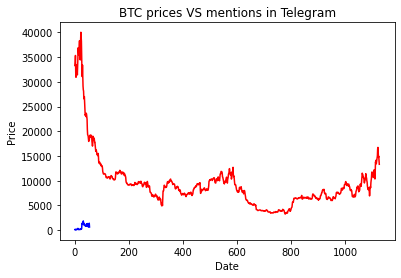

In [ ]:
#plotting BTC means VS mentions
x = btc['mean']
y = btc_mentions


plt.plot(x, color = 'r')
plt.plot(y, color = 'b')
plt.title('BTC prices VS mentions in Telegram')
plt.ylabel('Price')
plt.xlabel('Date')

Text(0.5, 0, 'Date')

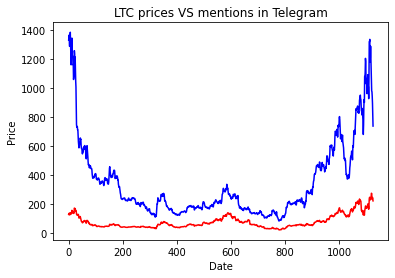

In [ ]:
x = ltc['mean']
y = ltc_mentions


plt.plot(x, color = 'r')
plt.plot(y, color = 'b')
plt.title('LTC prices VS mentions in Telegram')
plt.ylabel('Price')
plt.xlabel('Date')

Text(0.5, 0, 'Date')

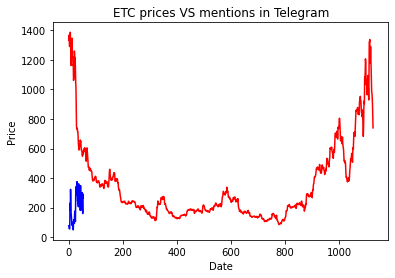

In [ ]:
x = eth['mean']
y = eth_mentions


plt.plot(x, color = 'r')
plt.plot(y, color = 'b')
plt.title('ETC prices VS mentions in Telegram')
plt.ylabel('Price')
plt.xlabel('Date')

In [ ]:
#btc_mentions = btc_mentions.stack()
#btc_mentions = btc_mentions.drop(,axis=1)
#btc_mentions.drop(columns=0, axis=1)
btc_mentions

In [ ]:
btc_mentions

In [ ]:
btc_55_mean.shape
print(btc_55_mean)

In [ ]:
btc_55 = btc[:54]
btc_55_mean = btc_55['mean']
btc_55_mean.corr(btc_mentions)

TypeError: ignored

In [ ]:
btc_mentions.shape

(55, 1)

In [ ]:
btc.shape

(1127, 4)

In [ ]:
btc.head(50)